Type I, Type II errors, link to hypothesis testing with code

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The purpose of a hypothesis test is to determine if the sample data provide sufficient evidence to reject the null hypothesis for the entire population.

Making a statistical decision based on the sample data always contains uncertainties due to sampling error.

Type I error: false positive, rejecting null when it is true (saying there is a difference when in fact there isn't)
Type II error: false negative, failing to reject the null, when it is false. 

$\alpha$: probability of making a type I error <br>
$\beta$: probability of making a type II error

Typically, α = 0.05 means if we repeat the hypothesis tests many times with different sets of sample data, we expect that 5% of the time we incorrectly reject the null hypothesis when it is true, and 95% of the time we won’t reject the null hypothesis.

Power = 1 - $\beta$ <br>
Since $\beta$ is the probability of making a type II error, which means failing the detect a difference when in fact there is. 
Conversely, power is defined as the probability of correctly rejecting the null hypothesis when it is false.

Prepare our data

In [23]:
mu1, sigma1 = 1, 0.1 # mean and standard deviation
mu2, sigma2 = 1.4, 0.1
group1 = np.random.normal(mu1, sigma1, 1000)
group2 = np.random.normal(mu2, sigma2, 1000)

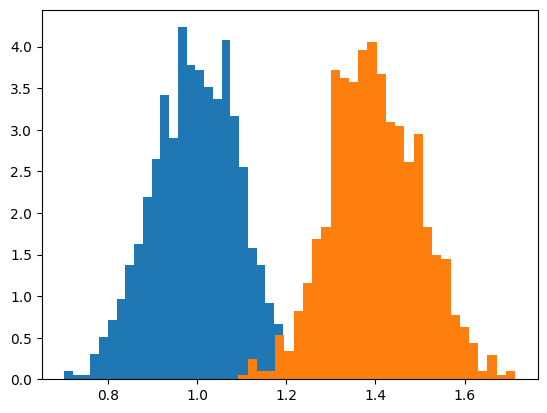

In [24]:
count, bins1, ignored = plt.hist(group1, 30, density=True)
count, bins2, ignored = plt.hist(group2, 30, density=True)

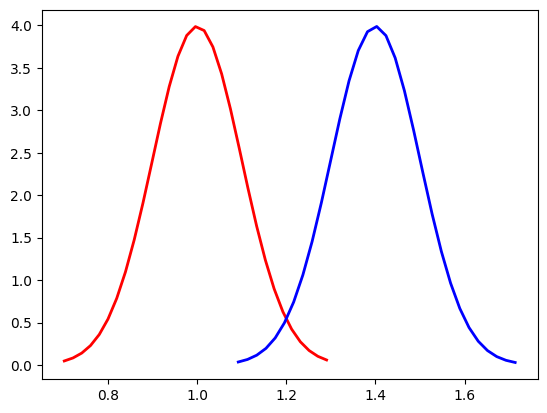

In [25]:
def gaussian_pdf(mu, sigma, bins):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )


plt.plot(bins1, gaussian_pdf(mu1, sigma1, bins1),
         linewidth=2, color='r')
plt.plot(bins2,  gaussian_pdf(mu2, sigma2, bins2),
         linewidth=2, color='b')

Sources: 
https://medium.com/geekculture/which-is-worse-type-i-or-type-ii-errors-f40a0f040fcc

